# Общие подготовительные действия

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

sns.set_theme()

In [2]:
ba = pd.read_csv("BusinessAnalyst.csv")
da = pd.read_csv("DataAnalyst.csv")
de = pd.read_csv("DataEngineer.csv")
ds = pd.read_csv("DataScientist.csv")

In [3]:
ba_1 = ba.iloc[:3692].copy()
ba_2 = ba.iloc[3692:].copy()
ba_2.iloc[:, 2:] = ba_2.iloc[:, :-2].values
ba = pd.concat([ba_1, ba_2])
ba.insert(0, "Cluster", 0)
(ba := ba.drop(columns=["Unnamed: 0", "index"]))

,Cluster,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1
1,0,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True
2,0,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1
3,0,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1
4,0,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087,0,Help Desk Analyst,$66K-$114K (Glassdoor est.),Ref ID: 01120-0011488945Classification: Help D...,3.5,Robert Half\n3.5,"Jacksonville, FL","Menlo Park, CA",10000+ employees,1948,Company - Public,Staffing & Outsourcing,Business Services,$2 to $5 billion (USD),"Adecco, Manpower",-1
4088,0,System Analyst (Data) - PL/SQl Server,$66K-$114K (Glassdoor est.),Job Title: System Analyst (Data) - PL/SQl Serv...,3.9,Diverse Lynx\n3.9,"Jacksonville, FL","Princeton, NJ",501 to 1000 employees,2002,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1
4089,0,Programmer Analyst- PeopleSoft ( Finance and S...,$66K-$114K (Glassdoor est.),Job Opening Summary\nReports to the Systems Ap...,4.0,Shands at the University of Florida\n4.0,"Jacksonville, FL","Gainesville, FL",10000+ employees,-1,Subsidiary or Business Segment,Health Care Services & Hospitals,Health Care,$1 to $2 billion (USD),"Mount Sinai Medical Center of Florida, Baptist...",-1
4090,0,Loss Mitigation Analyst,$66K-$114K (Glassdoor est.),Job Description\nA knowledgeable job-seeker is...,4.4,Contemporary Staffing Solutions\n4.4,"Jacksonville, FL","Mount Laurel, NJ",1001 to 5000 employees,1994,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),"PathFinder Staffing, Juno Search Partners, Rob...",-1


In [4]:
da.insert(0, "Cluster", 1)
(da := da.drop(columns=["Unnamed: 0"]))

,Cluster,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,1,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,1,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,1,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,1,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,1,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1
2249,1,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",-1
2250,1,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1,-1,-1,-1,-1
2251,1,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),-1,-1


In [5]:
de.insert(0, "Cluster", 2)
de

,Cluster,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,2,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,2,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,2,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,2,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,2,Cloud Engineer,$76K-$128K (Glassdoor est.),The Expertise You Have Proven expertise in dev...,4.5,PMG Global\n4.5,"Westlake, TX","Herndon, VA",1 to 50 employees,-1,Company - Private,Computer Hardware & Software,Information Technology,$1 to $5 million (USD),-1,-1
2524,2,Electrical Engineer,$76K-$128K (Glassdoor est.),Lockheed Martin is seeking a Circuit and FPGA ...,2.9,Albin Engineering Services\n2.9,"Fort Worth, TX","Santa Clara, CA",51 to 200 employees,1993,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,-1
2525,2,Sr. Big Data Engineer,$76K-$128K (Glassdoor est.),Posting Title Principal Data Engineer (Contrac...,3.7,Cincinnati Bell Technology Solutions\n3.7,"Irving, TX","Cincinnati, OH",501 to 1000 employees,-1,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1
2526,2,Senior Big Data / ETL Engineer,$76K-$128K (Glassdoor est.),"Your Opportunity\n\nCharles Schwab & Co., Inc ...",3.5,Schwab\n3.5,"Westlake, TX","Dettenheim, Germany",Unknown,-1,Company - Public,-1,-1,Unknown / Non-Applicable,-1,-1


In [6]:
ds.insert(0, "Cluster", 3)
(ds := ds.drop(columns=["Unnamed: 0", "index"]))

,Cluster,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,3,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,3,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,3,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,3,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,3,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),-1,-1
3905,3,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
3906,3,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),-1,-1
3907,3,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies\n4.0,"Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),-1,-1


In [7]:
(df := pd.concat([ba, da, de, ds], ignore_index=True))

,Cluster,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1
1,0,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True
2,0,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1
3,0,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1
4,0,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12777,3,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),-1,-1
12778,3,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
12779,3,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),-1,-1
12780,3,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies\n4.0,"Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),-1,-1


# Анализ данных, отбор и преобразование признаков

In [8]:
df.describe(include="object")

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
count,12782,12782,12782,12782.0,12781,12782,12782,12782,12782,12782,12782,12782,12782,12782,12782
unique,5823,447,10475,74.0,4921,404,990,9,372,15,113,26,14,905,2
top,Data Analyst,$60K-$109K (Glassdoor est.),Organization: Accenture Federal Services\n\nLo...,-1.0,"Staffigo Technical Services, LLC\n5.0","New York, NY","New York, NY",10000+ employees,-1,Company - Private,IT Services,Information Technology,Unknown / Non-Applicable,-1,-1
freq,806,92,15,915.0,264,1047,930,2772,2208,6858,1811,3694,3440,9228,12258


In [9]:
df[df.isna().any(axis=1)]

,Cluster,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
5952,1,Data Analyst,$53K-$99K (Glassdoor est.),"Kindred at Home, part of the Kindred at Home f...",-1.0,NaN,"Mooresville, NC",-1,-1,-1,-1,-1,-1,-1,-1,-1


In [10]:
(jobs := pd.DataFrame({"cluster": df["Cluster"]}))

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
12777,3
12778,3
12779,3
12780,3


## Зарплаты `Salary Estimate`

In [11]:
def get_salary_info(salary):
    if "Per Hour" in salary:
        salary_info = re.search(r'\$(\d+)-?\$?(\d+)?', salary)
        if salary_info:
            min_per_hour = int(salary_info.group(1))
            max_per_hour = int(salary_info.group(2))
            min_salary = min_per_hour * 40 * 52
            max_salary = max_per_hour * 40 * 52
    else:
        salary_info = re.search(r'\$(\d+)K-\$(\d+)K', salary)
        if salary_info:
            min_salary = int(salary_info.group(1)) * 1000
            max_salary = int(salary_info.group(2)) * 1000
    if not salary_info:
        return np.nan, np.nan, np.nan
    avg_salary = (min_salary + max_salary) / 2
    return min_salary, max_salary, avg_salary


salary_info = df["Salary Estimate"].apply(get_salary_info)
jobs["salary_min"] = salary_info.apply(lambda x: x[0])
jobs["salary_max"] = salary_info.apply(lambda x: x[1])
jobs["salary_avg"] = salary_info.apply(lambda x: x[2])
jobs

,cluster,salary_min,salary_max,salary_avg
0,0,56000.0,102000.0,79000.0
1,0,56000.0,102000.0,79000.0
2,0,56000.0,102000.0,79000.0
3,0,56000.0,102000.0,79000.0
4,0,56000.0,102000.0,79000.0
...,...,...,...,...
12777,3,55000.0,112000.0,83500.0
12778,3,55000.0,112000.0,83500.0
12779,3,55000.0,112000.0,83500.0
12780,3,55000.0,112000.0,83500.0


In [12]:
df[jobs.isna().any(axis=1)]

,Cluster,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
6241,1,Configuration/Data Management Analyst III,-1,Job Description\nPosition Title: Configuration...,4.4,Protingent\n4.4,"Kent, WA","Bellevue, WA",51 to 200 employees,2001,Company - Private,Staffing & Outsourcing,Business Services,$25 to $50 million (USD),-1,-1


In [13]:
jobs[["salary_min", "salary_max", "salary_avg"]].describe().astype(int)

,salary_min,salary_max,salary_avg
count,12781,12781,12781
mean,67538,112716,90127
std,29631,41604,34579
min,12000,38000,33500
25%,45000,81000,63000
50%,60000,104000,82000
75%,84000,138000,111000
max,200000,281000,225000


In [14]:
job_labels = ["Business Analyst", "Data Analyst", "Data Engineer", "Data Scientist"]

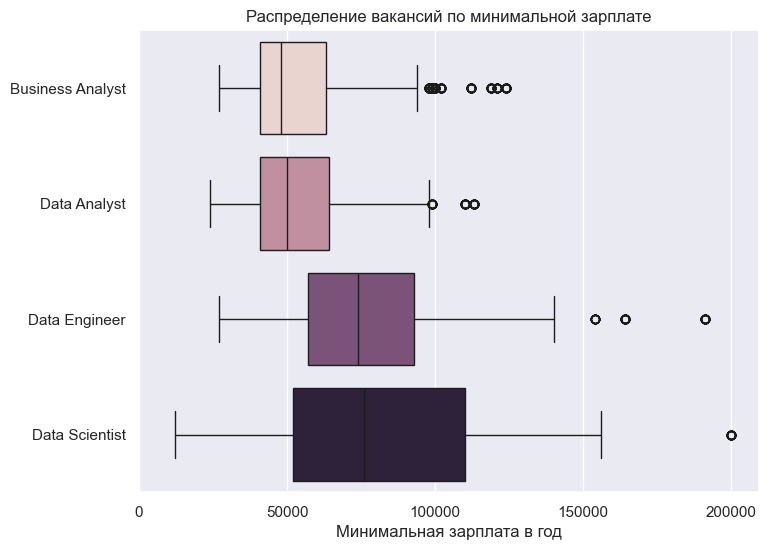

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(jobs, x="salary_min", y="cluster", hue="cluster", orient="h", legend=None).set(
    title="Распределение вакансий по минимальной зарплате",
    xlabel="Минимальная зарплата в год", xticks=range(0, 200001, 50000),
    ylabel="", yticks=range(4), yticklabels=job_labels
);

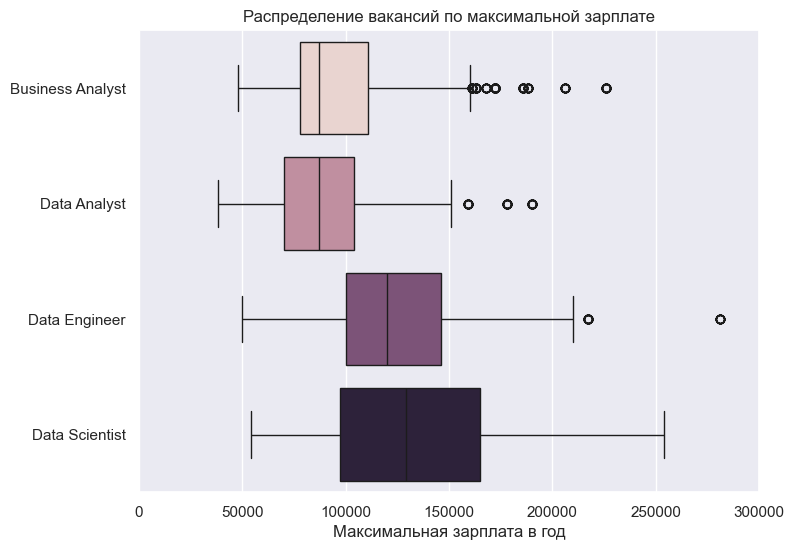

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(jobs, x="salary_max", y="cluster", hue="cluster", orient="h", legend=None).set(
    title="Распределение вакансий по максимальной зарплате",
    xlabel="Максимальная зарплата в год", xticks=range(0, 300001, 50000),
    ylabel="", yticks=range(4), yticklabels=job_labels
);

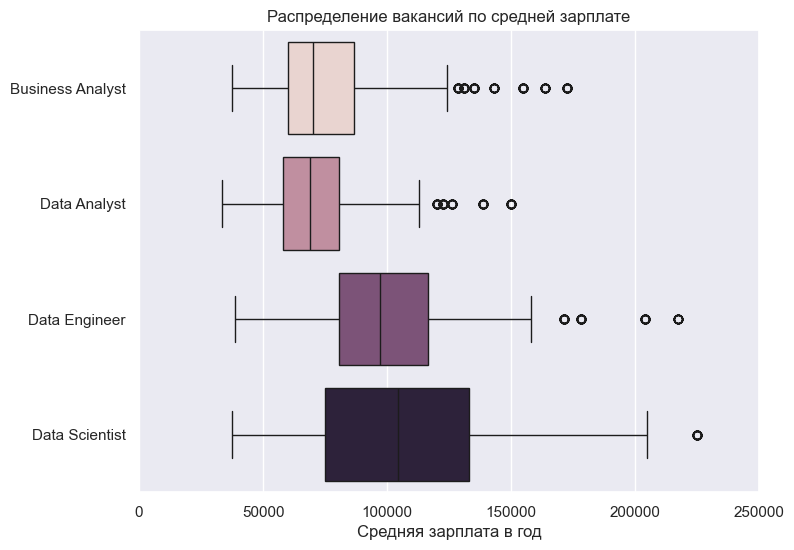

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(jobs, x="salary_avg", y="cluster", hue="cluster", orient="h", legend=None).set(
    title="Распределение вакансий по средней зарплате",
    xlabel="Средняя зарплата в год", xticks=range(0, 250001, 50000),
    ylabel="", yticks=range(4), yticklabels=job_labels
);

## Рейтинг `Rating`

In [18]:
jobs["rating"] = df["Rating"].astype(float)
jobs

,cluster,salary_min,salary_max,salary_avg,rating
0,0,56000.0,102000.0,79000.0,3.9
1,0,56000.0,102000.0,79000.0,3.8
2,0,56000.0,102000.0,79000.0,3.6
3,0,56000.0,102000.0,79000.0,3.6
4,0,56000.0,102000.0,79000.0,3.4
...,...,...,...,...,...
12777,3,55000.0,112000.0,83500.0,4.4
12778,3,55000.0,112000.0,83500.0,5.0
12779,3,55000.0,112000.0,83500.0,3.8
12780,3,55000.0,112000.0,83500.0,4.0


In [19]:
jobs.rating.describe().round(1)

count    12782.0
mean         3.3
std          1.6
min         -1.0
25%          3.2
50%          3.7
75%          4.1
max          5.0
Name: rating, dtype: float64

In [20]:
jobs[jobs.rating == -1]

,cluster,salary_min,salary_max,salary_avg,rating
64,0,81000.0,159000.0,120000.0,-1.0
76,0,81000.0,159000.0,120000.0,-1.0
89,0,85000.0,135000.0,110000.0,-1.0
115,0,85000.0,135000.0,110000.0,-1.0
116,0,85000.0,135000.0,110000.0,-1.0
...,...,...,...,...,...
12739,3,39000.0,86000.0,62500.0,-1.0
12749,3,39000.0,86000.0,62500.0,-1.0
12755,3,55000.0,112000.0,83500.0,-1.0
12756,3,55000.0,112000.0,83500.0,-1.0


In [21]:
for cluster in range(1, 5):
    job_mask = (jobs.cluster == cluster) & (jobs.rating == -1)
    job_median = jobs[(jobs.cluster == cluster) & (jobs.rating != -1)].rating.median()
    jobs.loc[job_mask, "rating"] = job_median
jobs.rating.describe().round(1)

count    12782.0
mean         3.6
std          1.0
min         -1.0
25%          3.4
50%          3.8
75%          4.1
max          5.0
Name: rating, dtype: float64

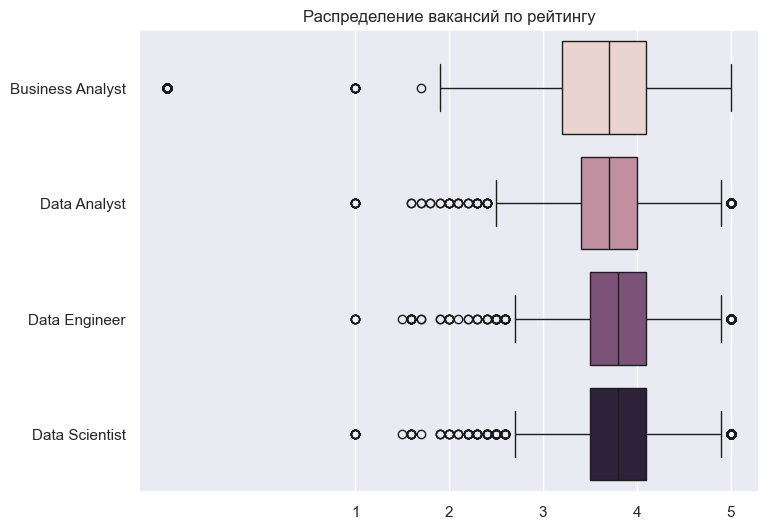

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(jobs, x="rating", y="cluster", hue="cluster", orient="h", legend=None).set(
    title="Распределение вакансий по рейтингу",
    xlabel="", xticks=range(1, 6),
    ylabel="", yticks=range(4), yticklabels=job_labels
);

## Штаты сотрудников `Size`

In [23]:
def get_company_size(revenue):
    if revenue in ["1 to 50 employees", "51 to 200 employees"]:
        return "Малый бизнес"
    if revenue in ["201 to 500 employees", "501 to 1000 employees"]:
        return "Средний бизнес"
    if revenue in ["1001 to 5000 employees", "5001 to 10000 employees"]:
        return "Большой бизнес"
    if revenue == "10000+ employees":
        return "Корпорация"
    return "Неизвестно"

jobs["company_size"] = df["Size"].apply(get_company_size)
jobs

,cluster,salary_min,salary_max,salary_avg,rating,company_size
0,0,56000.0,102000.0,79000.0,3.9,Корпорация
1,0,56000.0,102000.0,79000.0,3.8,Малый бизнес
2,0,56000.0,102000.0,79000.0,3.6,Средний бизнес
3,0,56000.0,102000.0,79000.0,3.6,Корпорация
4,0,56000.0,102000.0,79000.0,3.4,Средний бизнес
...,...,...,...,...,...,...
12777,3,55000.0,112000.0,83500.0,4.4,Средний бизнес
12778,3,55000.0,112000.0,83500.0,5.0,Малый бизнес
12779,3,55000.0,112000.0,83500.0,3.8,Большой бизнес
12780,3,55000.0,112000.0,83500.0,4.0,Малый бизнес


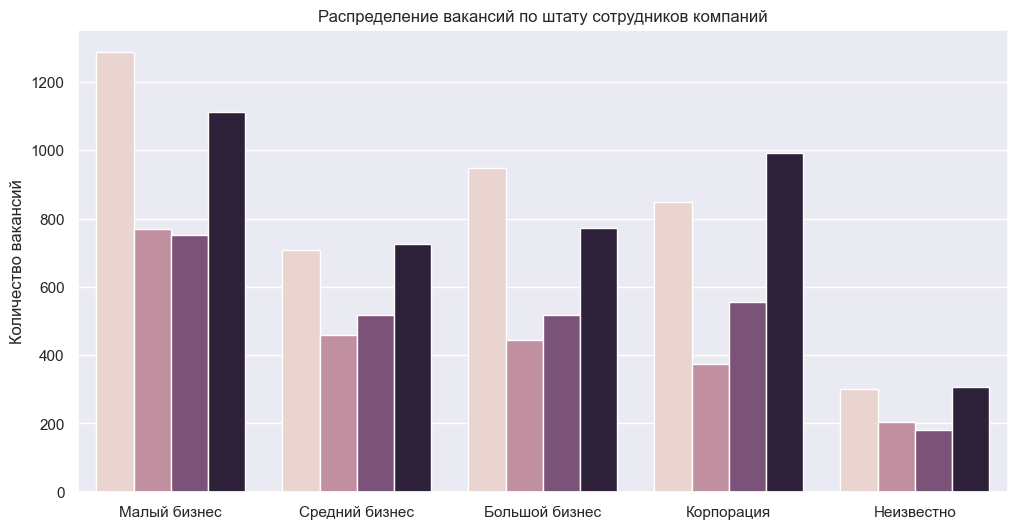

In [24]:
size_order = ["Малый бизнес", "Средний бизнес", "Большой бизнес", "Корпорация", "Неизвестно"]
company_size_counts = jobs.groupby(["company_size", "cluster"]).size().reset_index()
company_size_counts.columns = ["company_size", "cluster", "count"]
company_size_counts["company_size"] = pd.Categorical(
    company_size_counts["company_size"], 
    categories=size_order,
    ordered=True
)
plt.figure(figsize=(12, 6))
sns.barplot(
    company_size_counts, x="company_size", y="count",
    hue="cluster", order=size_order, legend=None
).set(
    title="Распределение вакансий по штату сотрудников компаний",
    xlabel="", ylabel="Количество вакансий"
);

## Годы основания компаний `Founded`

In [25]:
jobs["company_founded"] = df["Founded"].astype(int)
jobs

,cluster,salary_min,salary_max,salary_avg,rating,company_size,company_founded
0,0,56000.0,102000.0,79000.0,3.9,Корпорация,1884
1,0,56000.0,102000.0,79000.0,3.8,Малый бизнес,-1
2,0,56000.0,102000.0,79000.0,3.6,Средний бизнес,2004
3,0,56000.0,102000.0,79000.0,3.6,Корпорация,1897
4,0,56000.0,102000.0,79000.0,3.4,Средний бизнес,2007
...,...,...,...,...,...,...,...
12777,3,55000.0,112000.0,83500.0,4.4,Средний бизнес,2011
12778,3,55000.0,112000.0,83500.0,5.0,Малый бизнес,2008
12779,3,55000.0,112000.0,83500.0,3.8,Большой бизнес,1977
12780,3,55000.0,112000.0,83500.0,4.0,Малый бизнес,-1


In [26]:
jobs.company_founded.describe().astype(int)

count    12782
mean      1469
std        864
min         -1
25%         -1
50%       1981
75%       2002
max       2020
Name: company_founded, dtype: int64

In [27]:
jobs[jobs.company_founded == -1]

,cluster,salary_min,salary_max,salary_avg,rating,company_size,company_founded
1,0,56000.0,102000.0,79000.0,3.8,Малый бизнес,-1
10,0,56000.0,102000.0,79000.0,3.9,Большой бизнес,-1
27,0,56000.0,102000.0,79000.0,5.0,Малый бизнес,-1
31,0,55000.0,78000.0,66500.0,5.0,Малый бизнес,-1
36,0,55000.0,78000.0,66500.0,3.6,Малый бизнес,-1
...,...,...,...,...,...,...,...
12766,3,55000.0,112000.0,83500.0,3.7,Большой бизнес,-1
12768,3,55000.0,112000.0,83500.0,3.7,Большой бизнес,-1
12770,3,55000.0,112000.0,83500.0,3.6,Малый бизнес,-1
12780,3,55000.0,112000.0,83500.0,4.0,Малый бизнес,-1


In [28]:
for cluster in range(1, 5):
    job_mask = (jobs.cluster == cluster) & (jobs.company_founded == -1)
    job_median = jobs[(jobs.cluster == cluster) & (jobs.company_founded != -1)].company_founded.median()
    jobs.loc[job_mask, "company_founded"] = job_median
jobs.company_founded.describe().round(1)

count    12782.0
mean      1815.0
std        549.4
min         -1.0
25%       1963.0
50%       1995.0
75%       2002.0
max       2020.0
Name: company_founded, dtype: float64

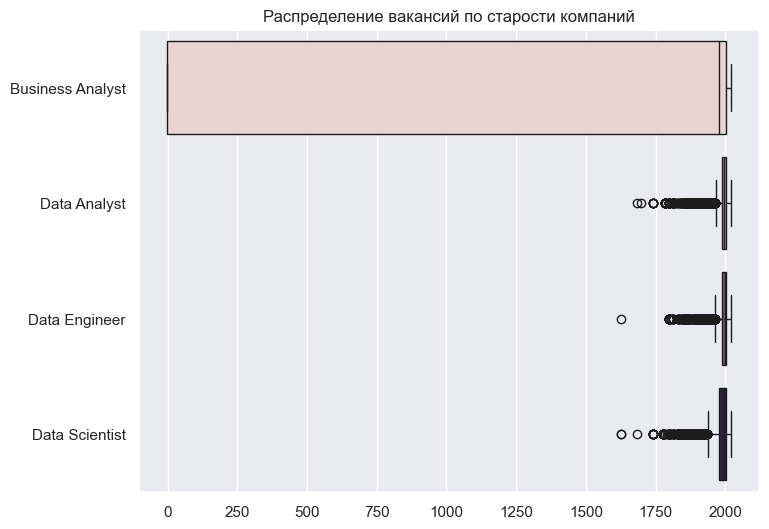

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(jobs, x="company_founded", y="cluster", hue="cluster", orient="h", legend=None).set(
    title="Распределение вакансий по старости компаний",
    xlabel="", ylabel="", yticks=range(4), yticklabels=job_labels
);

## Формы собственности компаний `Type of ownership`

In [30]:
df["Type of ownership"].unique()

array(['Nonprofit Organization', 'Company - Private', 'Company - Public',
       'Subsidiary or Business Segment', '-1', 'College / University',
       'Contract', 'Self-employed', 'Unknown', 'Hospital', 'Government',
       'Other Organization', 'School / School District', 'Franchise',
       'Private Practice / Firm'], dtype=object)

In [31]:
def get_company_ownership(ownership):
    if ownership == "Company - Private":
        return "Частная"
    if ownership == "Company - Public":
        return "Публичная"
    if ownership == "Subsidiary or Business Segment":
        return "Дочерняя"
    if any(x in ownership for x in ["Nonprofit", "Government", "Hospital", "College", "School"]):
        return "Некоммерческая"
    return "Другая"

jobs["company_ownership"] = df["Type of ownership"].apply(get_company_ownership)
jobs

,cluster,salary_min,salary_max,salary_avg,rating,company_size,company_founded,company_ownership
0,0,56000.0,102000.0,79000.0,3.9,Корпорация,1884.0,Некоммерческая
1,0,56000.0,102000.0,79000.0,3.8,Малый бизнес,-1.0,Частная
2,0,56000.0,102000.0,79000.0,3.6,Средний бизнес,2004.0,Частная
3,0,56000.0,102000.0,79000.0,3.6,Корпорация,1897.0,Публичная
4,0,56000.0,102000.0,79000.0,3.4,Средний бизнес,2007.0,Публичная
...,...,...,...,...,...,...,...,...
12777,3,55000.0,112000.0,83500.0,4.4,Средний бизнес,2011.0,Частная
12778,3,55000.0,112000.0,83500.0,5.0,Малый бизнес,2008.0,Частная
12779,3,55000.0,112000.0,83500.0,3.8,Большой бизнес,1977.0,Частная
12780,3,55000.0,112000.0,83500.0,4.0,Малый бизнес,1995.0,Частная


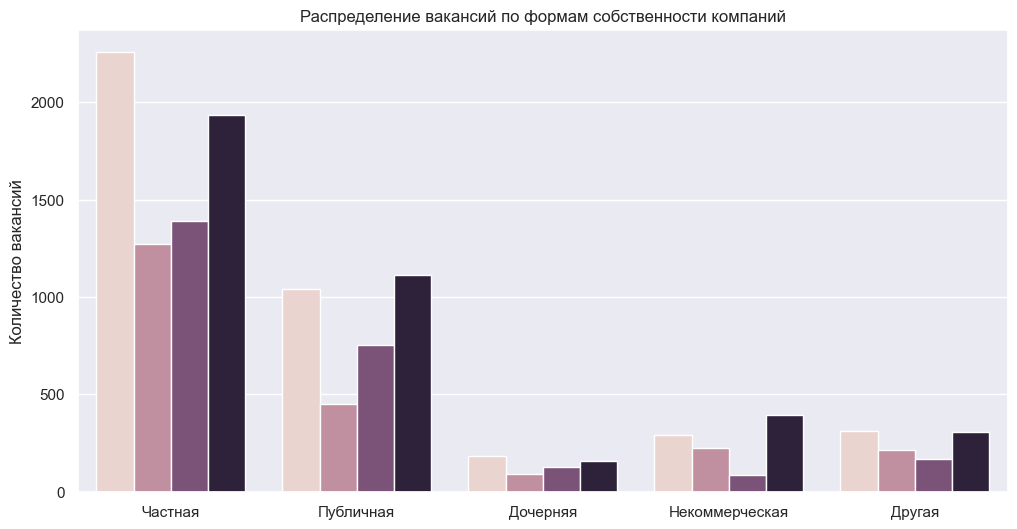

In [32]:
ownership_order = ["Частная", "Публичная", "Дочерняя", "Некоммерческая", "Другая"]
company_ownership_counts = jobs.groupby(["company_ownership", "cluster"]).size().reset_index()
company_ownership_counts.columns = ["company_ownership", "cluster", "count"]
company_ownership_counts["company_ownership"] = pd.Categorical(
    company_ownership_counts["company_ownership"], 
    categories=ownership_order,
    ordered=True
)
plt.figure(figsize=(12, 6))
sns.barplot(
    company_ownership_counts, x="company_ownership", y="count",
    hue="cluster", order=ownership_order, legend=None
).set(
    title="Распределение вакансий по формам собственности компаний",
    xlabel="", ylabel="Количество вакансий"
);

## Сферы деятельности компаний `Sector`

In [33]:
def get_company_sector(sector):
    if any(x in sector for x in ["Information", "Telecommunications", "Aerospace"]):
        return "Технологии"
    if any(x in sector for x in ["Business", "Finance", "Insurance", "Accounting", "Estate"]):
        return "Бизнес"
    if any(x in sector for x in ["Health", "Biotech"]):
        return "Здравоохранение"
    if any(x in sector for x in ["Manufacturing", "Oil", "Transportation", "Constructio", "Agriculture", "Mining"]):
        return "Промышленность"
    if any(x in sector for x in ["Retail", "Media", "Consumer", "Restaurants", "Arts", "Travel"]):
        return "Сфера услуг"
    elif any(x in sector for x in ["Education", "Government", "Non-Profit"]):
        return "Общественное"
    return "Неизвестно"

jobs["company_sector"] = df["Sector"].apply(get_company_sector)
jobs

,cluster,salary_min,salary_max,salary_avg,rating,company_size,company_founded,company_ownership,company_sector
0,0,56000.0,102000.0,79000.0,3.9,Корпорация,1884.0,Некоммерческая,Здравоохранение
1,0,56000.0,102000.0,79000.0,3.8,Малый бизнес,-1.0,Частная,Бизнес
2,0,56000.0,102000.0,79000.0,3.6,Средний бизнес,2004.0,Частная,Здравоохранение
3,0,56000.0,102000.0,79000.0,3.6,Корпорация,1897.0,Публичная,Промышленность
4,0,56000.0,102000.0,79000.0,3.4,Средний бизнес,2007.0,Публичная,Технологии
...,...,...,...,...,...,...,...,...,...
12777,3,55000.0,112000.0,83500.0,4.4,Средний бизнес,2011.0,Частная,Технологии
12778,3,55000.0,112000.0,83500.0,5.0,Малый бизнес,2008.0,Частная,Технологии
12779,3,55000.0,112000.0,83500.0,3.8,Большой бизнес,1977.0,Частная,Бизнес
12780,3,55000.0,112000.0,83500.0,4.0,Малый бизнес,1995.0,Частная,Бизнес


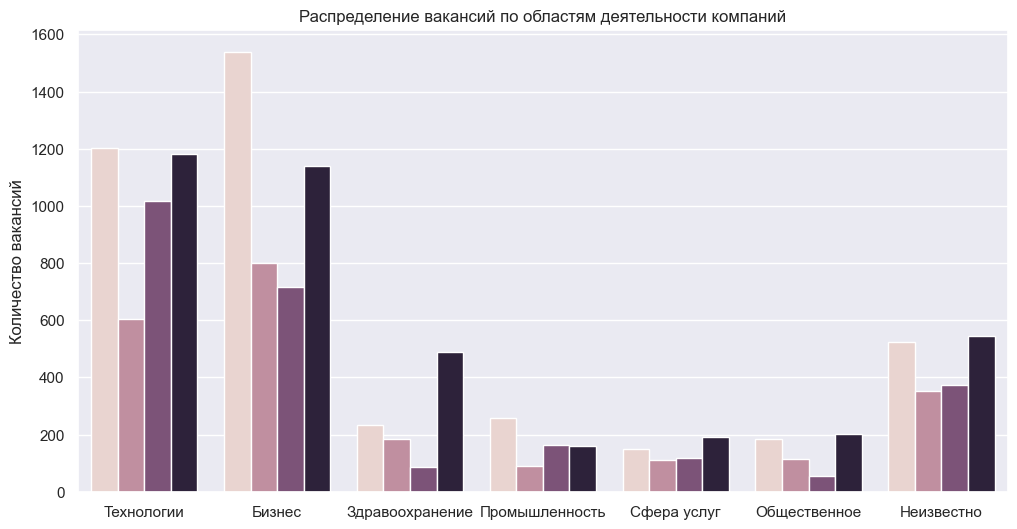

In [34]:
sector_order = ["Технологии", "Бизнес", "Здравоохранение", "Промышленность", "Сфера услуг", "Общественное", "Неизвестно"]
company_sector_counts = jobs.groupby(["company_sector", "cluster"]).size().reset_index()
company_sector_counts.columns = ["company_sector", "cluster", "count"]
company_sector_counts["company_sector"] = pd.Categorical(
    company_sector_counts["company_sector"], 
    categories=sector_order,
    ordered=True
)
plt.figure(figsize=(12, 6))
sns.barplot(
    company_sector_counts, x="company_sector", y="count",
    hue="cluster", order=sector_order, legend=None
).set(
    title="Распределение вакансий по областям деятельности компаний",
    xlabel="", ylabel="Количество вакансий"
);

## Выручка компаний `Revenue`

In [35]:
def get_company_revenue(revenue):
    if revenue in ["Less than $1 million (USD)", "$1 to $5 million (USD)"]:
        return "Малый бизнес"
    if revenue in ["$5 to $10 million (USD)", "$10 to $25 million (USD)", "$25 to $50 million (USD)"]:
        return "Средний бизнес"
    if revenue in ["$50 to $100 million (USD)", "$100 to $500 million (USD)"]:
        return "Большой бизнес"
    if revenue in ["$500 million to $1 billion (USD)", "$1 to $2 billion (USD)", "$2 to $5 billion (USD)"]:
        return "Корпорация"
    if revenue in ["$5 to $10 billion (USD)", "$10+ billion (USD)"]:
        return "Мегакорпорация"
    return "Неизвестно"

jobs["company_revenue"] = df["Revenue"].apply(get_company_revenue)
jobs

,cluster,salary_min,salary_max,salary_avg,rating,company_size,company_founded,company_ownership,company_sector,company_revenue
0,0,56000.0,102000.0,79000.0,3.9,Корпорация,1884.0,Некоммерческая,Здравоохранение,Корпорация
1,0,56000.0,102000.0,79000.0,3.8,Малый бизнес,-1.0,Частная,Бизнес,Неизвестно
2,0,56000.0,102000.0,79000.0,3.6,Средний бизнес,2004.0,Частная,Здравоохранение,Средний бизнес
3,0,56000.0,102000.0,79000.0,3.6,Корпорация,1897.0,Публичная,Промышленность,Мегакорпорация
4,0,56000.0,102000.0,79000.0,3.4,Средний бизнес,2007.0,Публичная,Технологии,Большой бизнес
...,...,...,...,...,...,...,...,...,...,...
12777,3,55000.0,112000.0,83500.0,4.4,Средний бизнес,2011.0,Частная,Технологии,Средний бизнес
12778,3,55000.0,112000.0,83500.0,5.0,Малый бизнес,2008.0,Частная,Технологии,Большой бизнес
12779,3,55000.0,112000.0,83500.0,3.8,Большой бизнес,1977.0,Частная,Бизнес,Большой бизнес
12780,3,55000.0,112000.0,83500.0,4.0,Малый бизнес,1995.0,Частная,Бизнес,Малый бизнес


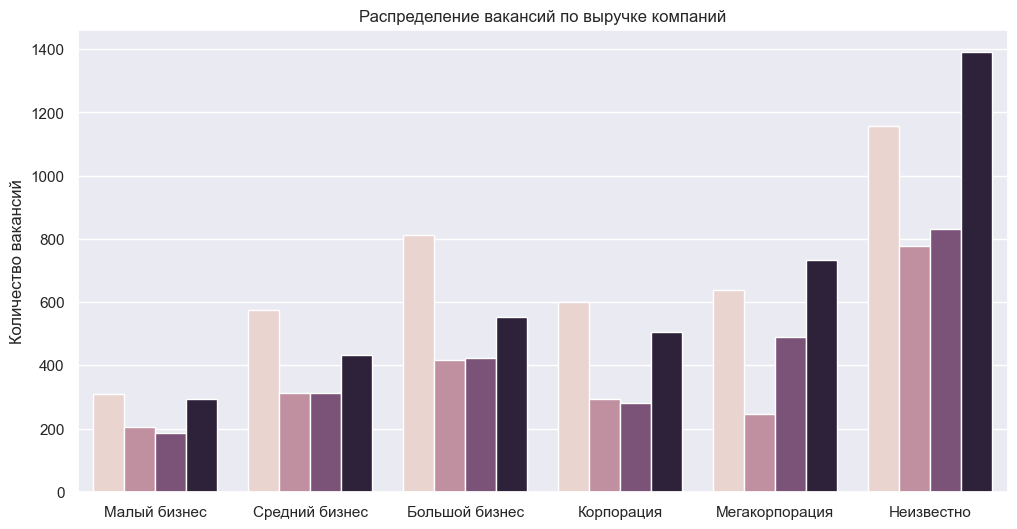

In [36]:
revenue_order = ["Малый бизнес", "Средний бизнес", "Большой бизнес", "Корпорация", "Мегакорпорация", "Неизвестно"]
company_revenue_counts = jobs.groupby(["company_revenue", "cluster"]).size().reset_index()
company_revenue_counts.columns = ["company_revenue", "cluster", "count"]
company_revenue_counts["company_revenue"] = pd.Categorical(
    company_revenue_counts["company_revenue"], 
    categories=revenue_order,
    ordered=True
)
plt.figure(figsize=(12, 6))
sns.barplot(
    company_revenue_counts, x="company_revenue", y="count",
    hue="cluster", order=revenue_order, legend=None
).set(
    title="Распределение вакансий по выручке компаний",
    xlabel="", ylabel="Количество вакансий"
);

## Упрощённое трудоустройство `Easy Apply`

In [37]:
jobs["easy_apply"] = df["Easy Apply"].map({"-1": 0, "True": 1})
jobs

,cluster,salary_min,salary_max,salary_avg,rating,company_size,company_founded,company_ownership,company_sector,company_revenue,easy_apply
0,0,56000.0,102000.0,79000.0,3.9,Корпорация,1884.0,Некоммерческая,Здравоохранение,Корпорация,0
1,0,56000.0,102000.0,79000.0,3.8,Малый бизнес,-1.0,Частная,Бизнес,Неизвестно,1
2,0,56000.0,102000.0,79000.0,3.6,Средний бизнес,2004.0,Частная,Здравоохранение,Средний бизнес,0
3,0,56000.0,102000.0,79000.0,3.6,Корпорация,1897.0,Публичная,Промышленность,Мегакорпорация,0
4,0,56000.0,102000.0,79000.0,3.4,Средний бизнес,2007.0,Публичная,Технологии,Большой бизнес,1
...,...,...,...,...,...,...,...,...,...,...,...
12777,3,55000.0,112000.0,83500.0,4.4,Средний бизнес,2011.0,Частная,Технологии,Средний бизнес,0
12778,3,55000.0,112000.0,83500.0,5.0,Малый бизнес,2008.0,Частная,Технологии,Большой бизнес,0
12779,3,55000.0,112000.0,83500.0,3.8,Большой бизнес,1977.0,Частная,Бизнес,Большой бизнес,0
12780,3,55000.0,112000.0,83500.0,4.0,Малый бизнес,1995.0,Частная,Бизнес,Малый бизнес,0


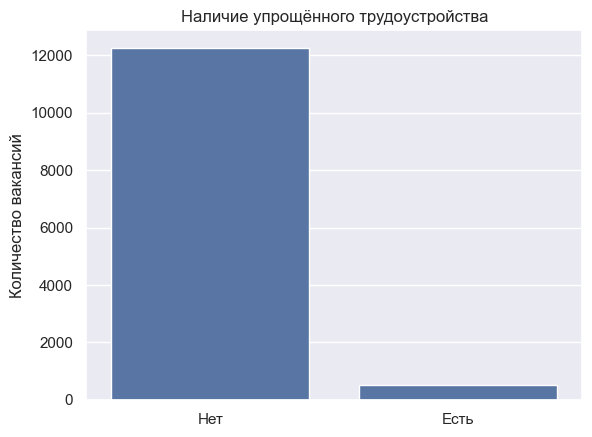

In [38]:
sns.countplot(jobs, x="easy_apply").set(
    title="Наличие упрощённого трудоустройства",
    xlabel="", xticks=range(2), xticklabels=["Нет", "Есть"],
    ylabel="Количество вакансий"
);

In [39]:
jobs[jobs.isna().any(axis=1)]

,cluster,salary_min,salary_max,salary_avg,rating,company_size,company_founded,company_ownership,company_sector,company_revenue,easy_apply
6241,1,NaN,NaN,NaN,4.4,Малый бизнес,2001.0,Частная,Бизнес,Средний бизнес,0


In [40]:
jobs.drop(6241, inplace=True)
jobs.reset_index(drop=True, inplace=True)

# Обучение модели

In [41]:
(X := jobs.drop(columns="cluster"))

,salary_min,salary_max,salary_avg,rating,company_size,company_founded,company_ownership,company_sector,company_revenue,easy_apply
0,56000.0,102000.0,79000.0,3.9,Корпорация,1884.0,Некоммерческая,Здравоохранение,Корпорация,0
1,56000.0,102000.0,79000.0,3.8,Малый бизнес,-1.0,Частная,Бизнес,Неизвестно,1
2,56000.0,102000.0,79000.0,3.6,Средний бизнес,2004.0,Частная,Здравоохранение,Средний бизнес,0
3,56000.0,102000.0,79000.0,3.6,Корпорация,1897.0,Публичная,Промышленность,Мегакорпорация,0
4,56000.0,102000.0,79000.0,3.4,Средний бизнес,2007.0,Публичная,Технологии,Большой бизнес,1
...,...,...,...,...,...,...,...,...,...,...
12776,55000.0,112000.0,83500.0,4.4,Средний бизнес,2011.0,Частная,Технологии,Средний бизнес,0
12777,55000.0,112000.0,83500.0,5.0,Малый бизнес,2008.0,Частная,Технологии,Большой бизнес,0
12778,55000.0,112000.0,83500.0,3.8,Большой бизнес,1977.0,Частная,Бизнес,Большой бизнес,0
12779,55000.0,112000.0,83500.0,4.0,Малый бизнес,1995.0,Частная,Бизнес,Малый бизнес,0


In [42]:
def one_hot_encode(df, column_name):
    encoder = OneHotEncoder(sparse_output=False)
    encoded_array = encoder.fit_transform(df[[column_name]])

    columns_new = encoder.categories_[0]
    for i in range(len(columns_new)):
        category = columns_new[i].lower().replace("-", "_").replace(" ", "_")
        columns_new[i] = f"{column_name}_{category}"
    
    return pd.DataFrame(encoded_array, index=df.index, columns=columns_new)

In [43]:
for column_name in ["company_size", "company_ownership", "company_sector", "company_revenue"]:
    encoded_columns = one_hot_encode(X, column_name)
    X = X.drop(columns=column_name)
    X = pd.concat([X, encoded_columns], axis=1)
X

,salary_min,salary_max,salary_avg,rating,company_founded,easy_apply,company_size_большой_бизнес,company_size_корпорация,company_size_малый_бизнес,company_size_неизвестно,...,company_sector_общественное,company_sector_промышленность,company_sector_сфера_услуг,company_sector_технологии,company_revenue_большой_бизнес,company_revenue_корпорация,company_revenue_малый_бизнес,company_revenue_мегакорпорация,company_revenue_неизвестно,company_revenue_средний_бизнес
0,56000.0,102000.0,79000.0,3.9,1884.0,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,56000.0,102000.0,79000.0,3.8,-1.0,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,56000.0,102000.0,79000.0,3.6,2004.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,56000.0,102000.0,79000.0,3.6,1897.0,0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,56000.0,102000.0,79000.0,3.4,2007.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12776,55000.0,112000.0,83500.0,4.4,2011.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
12777,55000.0,112000.0,83500.0,5.0,2008.0,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
12778,55000.0,112000.0,83500.0,3.8,1977.0,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12779,55000.0,112000.0,83500.0,4.0,1995.0,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [44]:
kmeans = KMeans(n_clusters=4, random_state=0)
y_pred = kmeans.fit_predict(X)
jobs_new = jobs.copy()
jobs_new.cluster = y_pred
jobs_new

,cluster,salary_min,salary_max,salary_avg,rating,company_size,company_founded,company_ownership,company_sector,company_revenue,easy_apply
0,3,56000.0,102000.0,79000.0,3.9,Корпорация,1884.0,Некоммерческая,Здравоохранение,Корпорация,0
1,3,56000.0,102000.0,79000.0,3.8,Малый бизнес,-1.0,Частная,Бизнес,Неизвестно,1
2,3,56000.0,102000.0,79000.0,3.6,Средний бизнес,2004.0,Частная,Здравоохранение,Средний бизнес,0
3,3,56000.0,102000.0,79000.0,3.6,Корпорация,1897.0,Публичная,Промышленность,Мегакорпорация,0
4,3,56000.0,102000.0,79000.0,3.4,Средний бизнес,2007.0,Публичная,Технологии,Большой бизнес,1
...,...,...,...,...,...,...,...,...,...,...,...
12776,3,55000.0,112000.0,83500.0,4.4,Средний бизнес,2011.0,Частная,Технологии,Средний бизнес,0
12777,3,55000.0,112000.0,83500.0,5.0,Малый бизнес,2008.0,Частная,Технологии,Большой бизнес,0
12778,3,55000.0,112000.0,83500.0,3.8,Большой бизнес,1977.0,Частная,Бизнес,Большой бизнес,0
12779,3,55000.0,112000.0,83500.0,4.0,Малый бизнес,1995.0,Частная,Бизнес,Малый бизнес,0


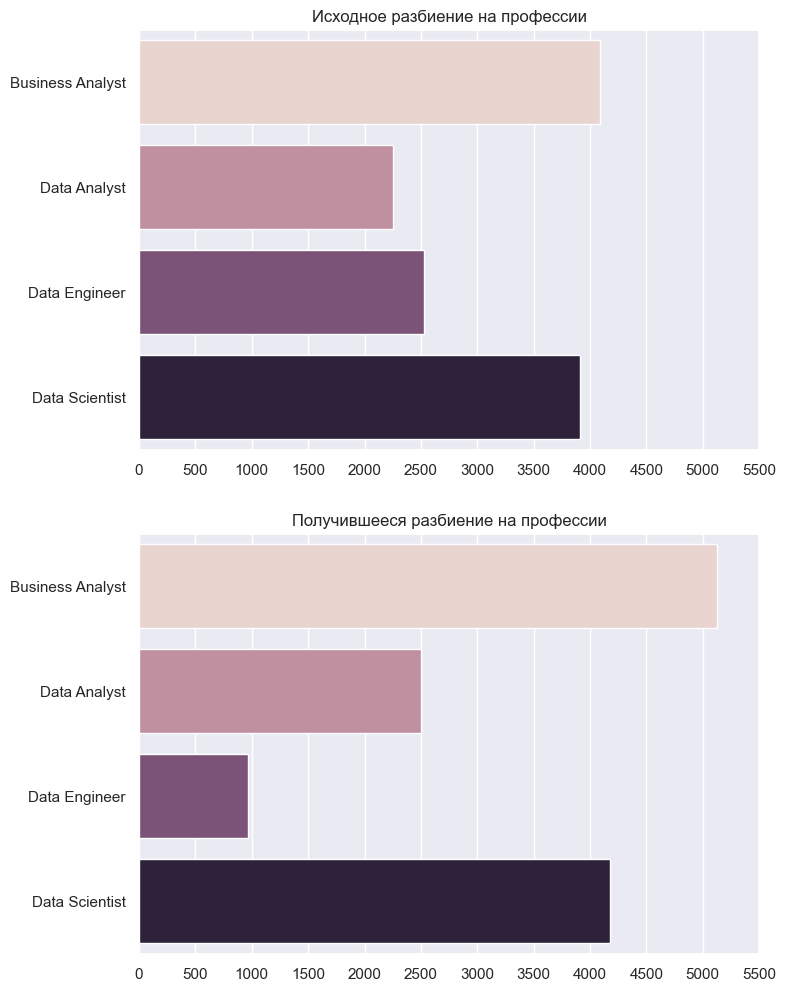

In [48]:
true_counts = jobs.cluster.value_counts().sort_index()
pred_counts = jobs_new.cluster.value_counts().sort_index()
_, ax = plt.subplots(nrows=2, figsize=(8, 12))
sns.barplot(
    x=true_counts.values, y=true_counts.index,
    hue=range(4), orient="h", legend=None, ax=ax[0]
).set(
    title="Исходное разбиение на профессии",
    xticks=range(0, 5501, 500),
    ylabel="", yticks=range(4), yticklabels=job_labels
)
sns.barplot(
    x=pred_counts.values, y=pred_counts.index,
    hue=range(4), orient="h", legend=None, ax=ax[1]
).set(
    title="Получившееся разбиение на профессии",
    xticks=range(0, 5501, 500),
    ylabel="", yticks=range(4), yticklabels=job_labels
);

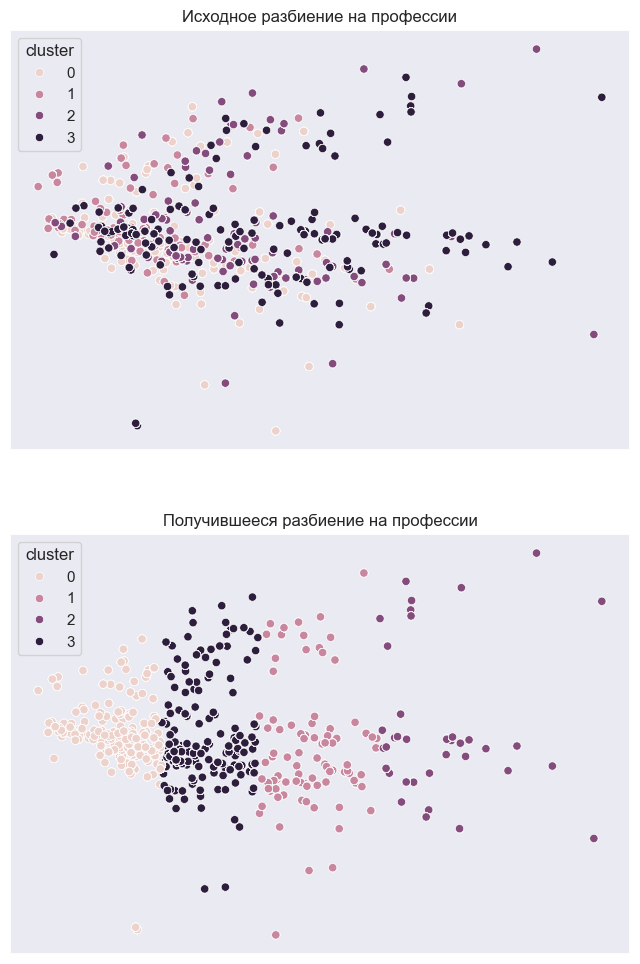

In [ ]:
pca = PCA(2)
X_pca = pca.fit_transform(X)
_, ax = plt.subplots(nrows=2, figsize=(8, 12))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=jobs.cluster, ax=ax[0]).set(
    title="Исходное разбиение на профессии", xticks=[], yticks=[]
)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=jobs_new.cluster, ax=ax[1]).set(
    title="Получившееся разбиение на профессии", xticks=[], yticks=[]
);